In [1]:
import pandas as pd
import numpy as np
import zipfile as zf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
import joblib as jb

In [ ]:
# new learnings:
-----------------

# zipfile reading, extracting
# String Formatting usage
# display instead of Print (for better readability especially for dataframes)
# train.columns.difference(test.columns) --> last class itself
# To plot charts for each feature in a loop
    # subplot usage plt.subplot(row,col,plotposition)
    # rows , cols derivation to use in subplot
    # plt.getp(a.get_xticklabels(),rotation = 90) --> x axis Label display formatting
# With crosstab , have always used plot(kind= bar, stacked = True) but Pie chart is 
# implemented on top of crosstab (Have used pie charts for only univariate analysis) 
# this will give 'n' pie charts based on 'n' category in crosstab 'y' column
# ConfusionMatrixDisplay.from_predictions(train_y,train_pred_y) (nothing but pictorial rep of ConfusionMatrix)

In [4]:
warnings.filterwarnings('ignore')

In [67]:
#file  = zf.ZipFile('/content/Participants_Data_STPSHa.zip')

In [68]:
#file.extractall()

In [2]:
train = pd.read_csv('train.csv')

In [6]:
test = pd.read_csv('test.csv')

In [7]:
submission = pd.read_csv('submission.csv')


In [8]:
train.shape, test.shape,submission.shape

((21000, 17), (9000, 16), (9000, 1))

In [9]:
print('There are',train.shape[0], 'records with',train.shape[1],'colums in train data set')

There are 21000 records with 17 colums in train data set


In [9]:
# String Formatting

In [10]:
print('There are {} records with {} colums in train data set'.format(train.shape[0],train.shape[1]))
print('There are {} records with {} colums in test data set'.format(test.shape[0],test.shape[1]))
print('There are {} records with {} colums in submission data set'.format(submission.shape[0],submission.shape[1]))

There are 21000 records with 17 colums in train data set
There are 9000 records with 16 colums in test data set
There are 9000 records with 1 colums in submission data set


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


In [77]:
display(train.head(2),test.head(2),submission.head(2))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown


,y_bool
0,0
1,0


In [78]:
train.columns.difference(test.columns)

Index(['y_bool'], dtype='object')

In [79]:
train.nunique(), test.nunique(),submission.nunique()

(age            68
 job            12
 marital         3
 education       4
 default         2
 balance      5587
 housing         2
 loan            2
 contact         3
 day            31
 month          12
 duration     1456
 campaign       26
 pdays         236
 previous       15
 poutcome        4
 y_bool          2
 dtype: int64,
 age            61
 job            12
 marital         3
 education       4
 default         2
 balance      3724
 housing         2
 loan            2
 contact         3
 day            31
 month          12
 duration     1117
 campaign       22
 pdays         171
 previous       15
 poutcome        4
 dtype: int64,
 y_bool    1
 dtype: int64)

In [3]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [80]:
submission.mode()

,y_bool
0,0


In [11]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

In [17]:
data = pd.concat([train,test])

In [13]:
display(train.shape,test.shape,data.shape)

(21000, 17)

(9000, 16)

(30000, 17)

In [84]:
print('Train - {} , test - {} and \nthe combined train-test - {}'.format(train.shape,test.shape,data.shape))

Train - (21000, 17) , test - (9000, 16) and 
the combined train-test - (30000, 17)


In [18]:
cat_cols = data.drop(columns ='y_bool').select_dtypes(include = object).columns
num_cols = data.drop(columns ='y_bool').select_dtypes(include = np.number).columns
display(cat_cols,num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

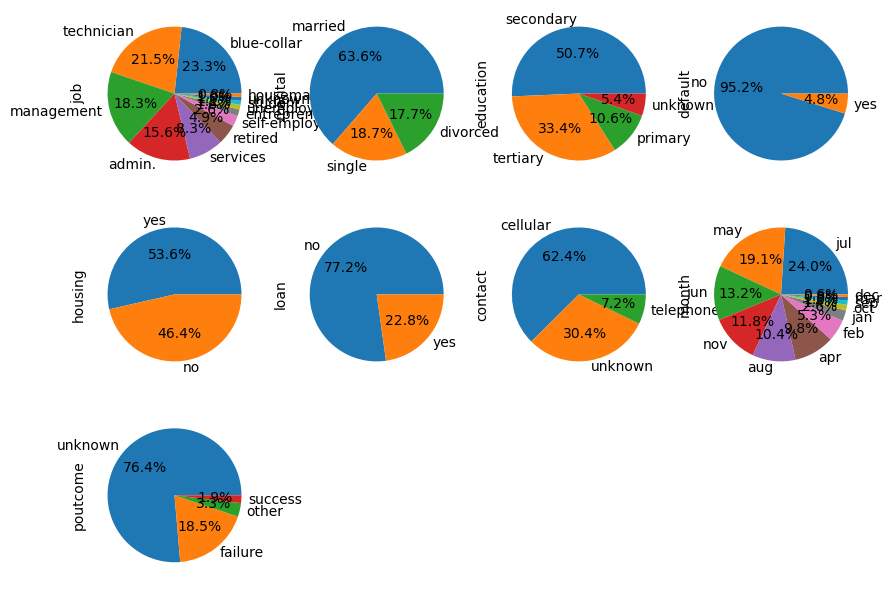

In [15]:
rows = int(np.sqrt(data.shape[1]))
cols = int(np.sqrt(data.shape[1]))
iter= 1

plt.figure(figsize = (10,10))

for i in cat_cols:
  plt.subplot(rows,cols,iter)
  data[i].value_counts().plot.pie(autopct = '%1.1f%%')
  iter+=1


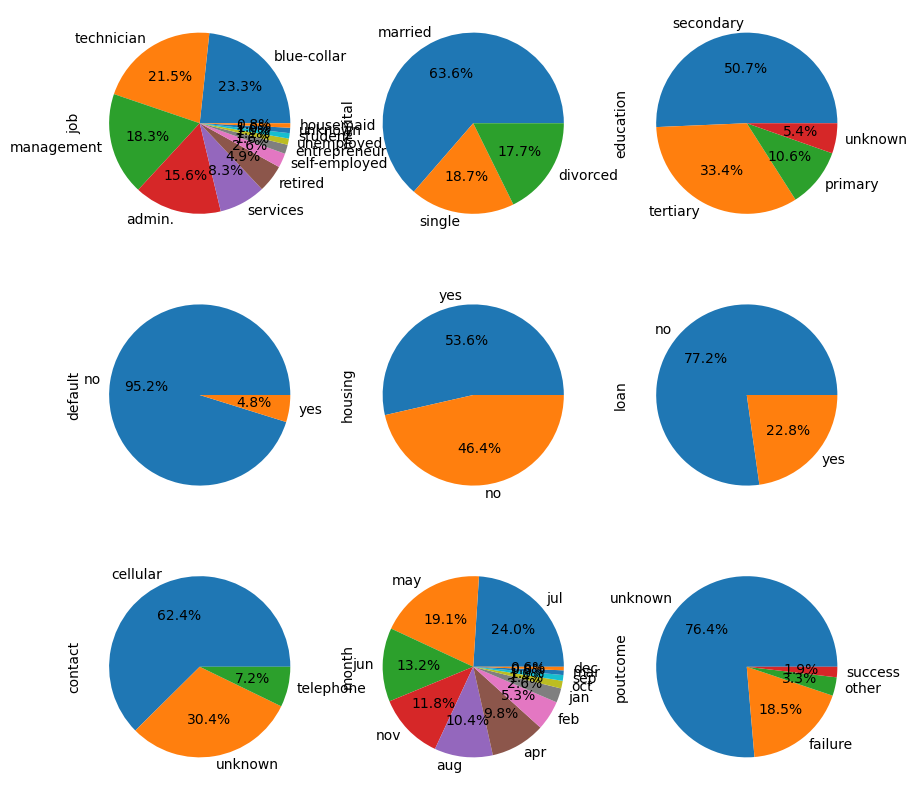

In [87]:

row =  int(np.sqrt(pd.DataFrame(cat_cols).count()))
col =  int(np.sqrt(pd.DataFrame(cat_cols).count()))
index = 1

plt.figure(figsize = (10,10))

for i in cat_cols:
  plt.subplot(row,col,index)
  data[i].value_counts().plot.pie(autopct = '%1.1f%%')
  index+=1

In [88]:
# NEW

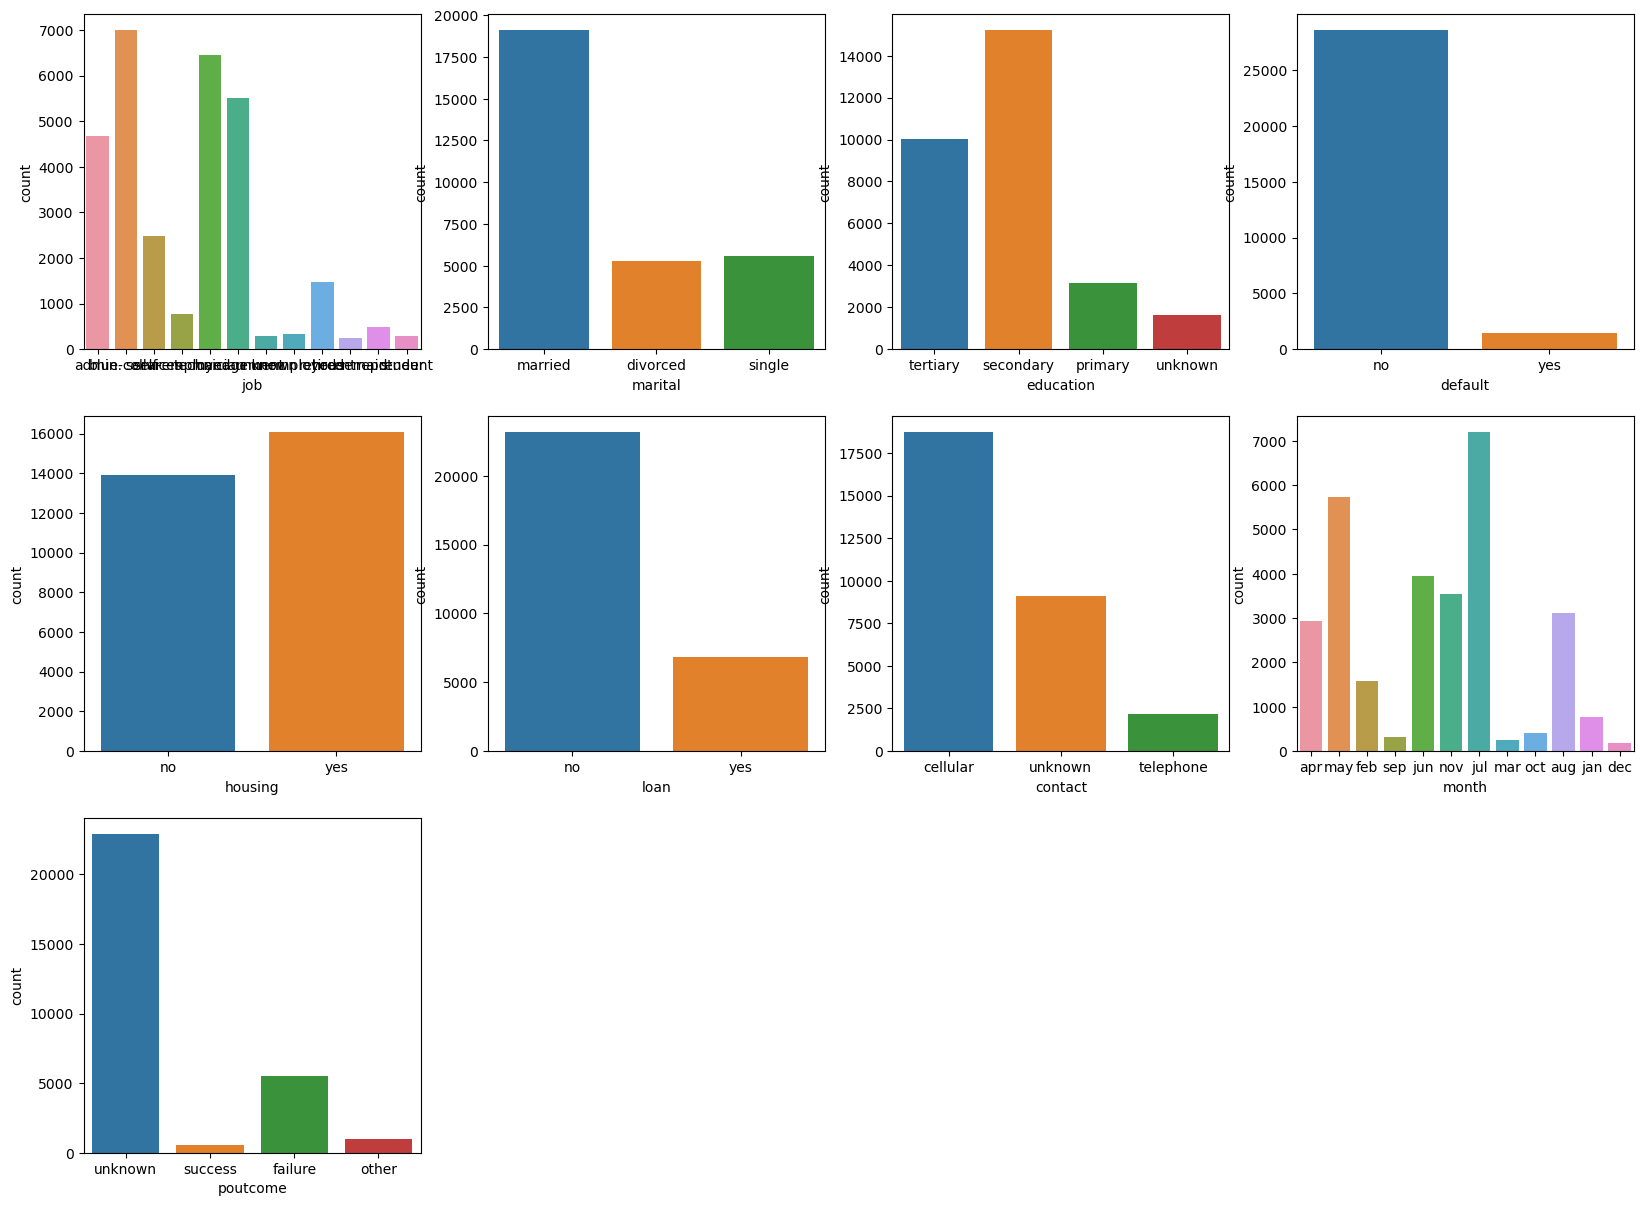

In [18]:
rows = int(np.sqrt(data.shape[1]))
cols = int(np.sqrt(data.shape[1]))
iter= 1

plt.figure(figsize = (20,20))

for i in cat_cols:
  plt.subplot(rows,cols,iter)
  a = sns.countplot(x =data[i])
  iter+=1

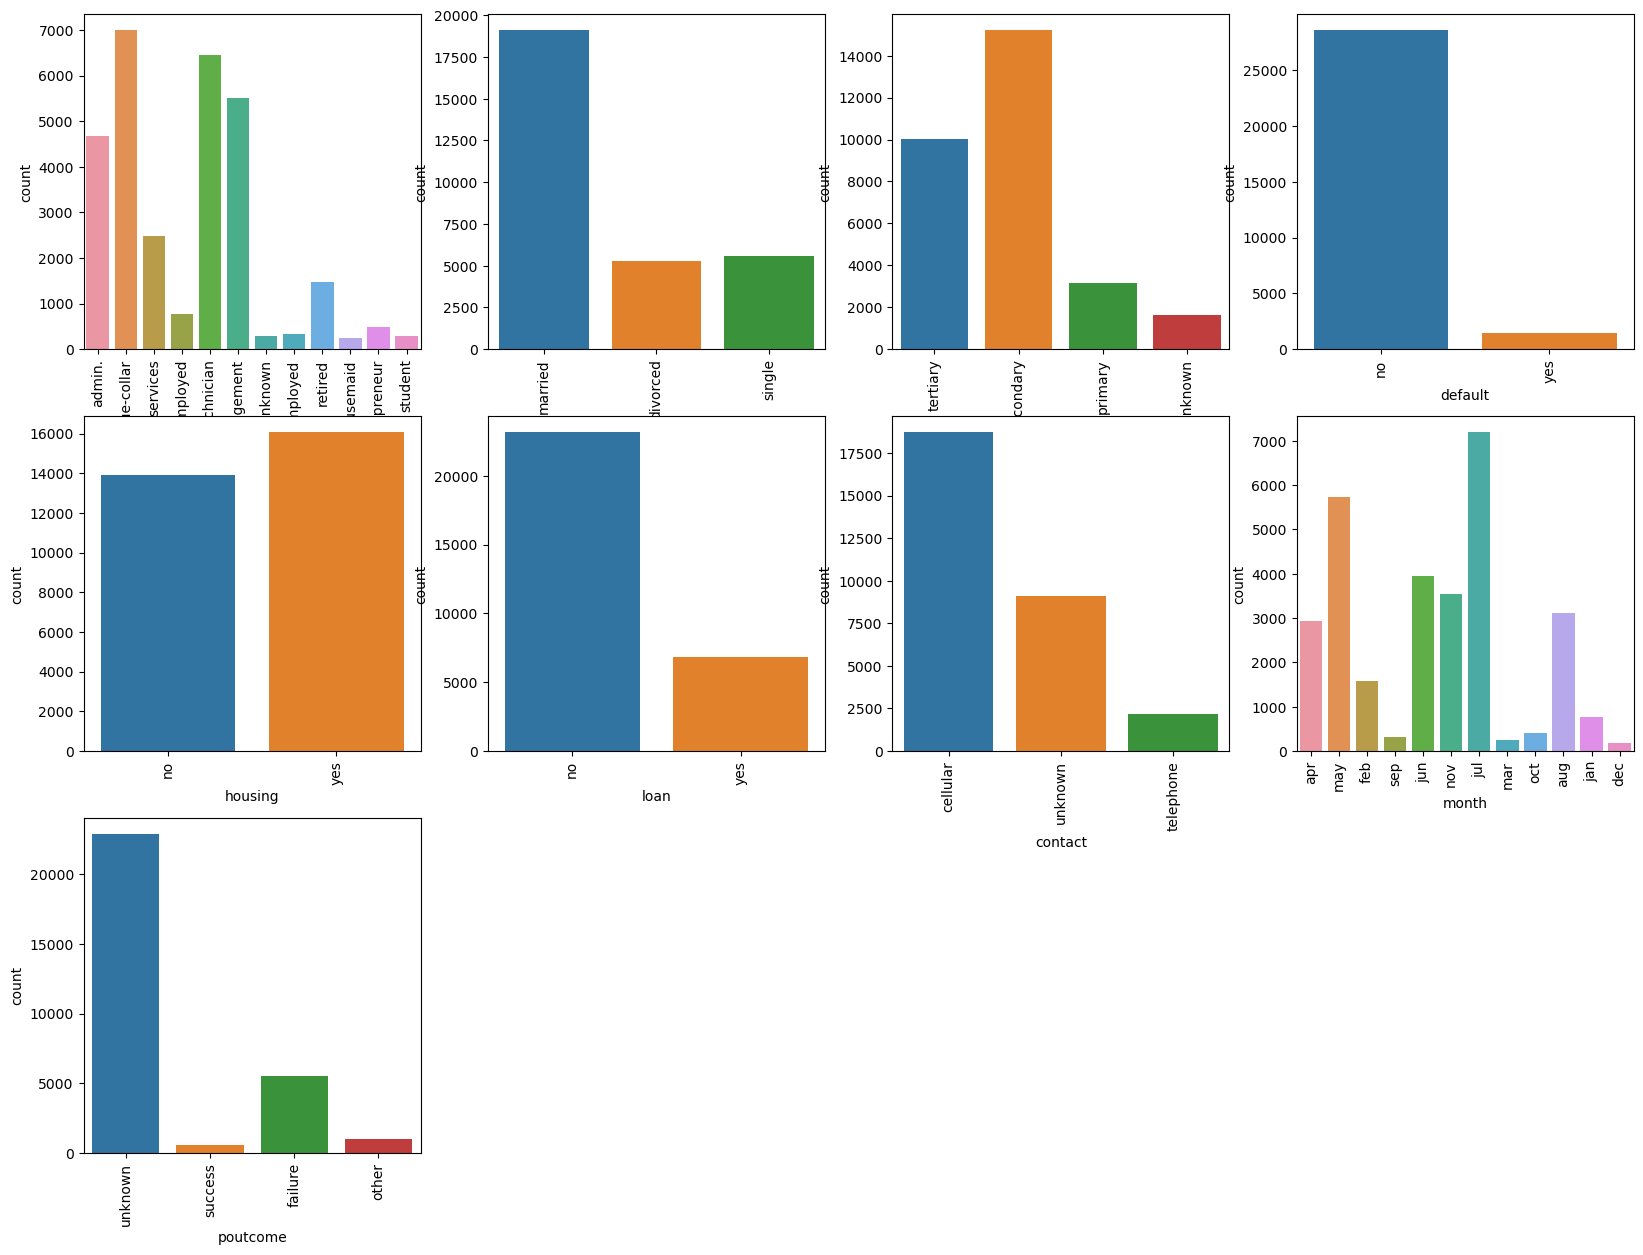

In [90]:
# rotating the xlable 90degree readable format
rows = int(np.sqrt(data.shape[1]))
cols = int(np.sqrt(data.shape[1]))
iter= 1

plt.figure(figsize = (20,20))

for i in cat_cols:
  plt.subplot(rows,cols,iter)
  a = sns.countplot(x =data[i])
  plt.setp(a.get_xticklabels(),rotation = 90)
  iter+=1

In [19]:
pd.crosstab(data['marital'],data['y_bool'])

y_bool,0.0,1.0
marital,,
divorced,2703,1010
married,9776,3636
single,2870,1005


In [20]:
a = pd.crosstab(data['marital'],data['y_bool'])
a.sum(1)

marital
divorced     3713
married     13412
single       3875
dtype: int64

In [21]:

a.div(a.sum(1).astype(float),axis = 0)

y_bool,0.0,1.0
marital,,
divorced,0.727983,0.272017
married,0.728899,0.271101
single,0.740645,0.259355


<Axes: xlabel='marital'>

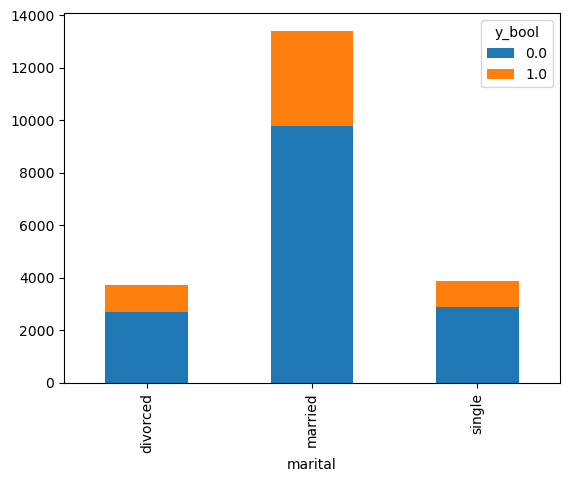

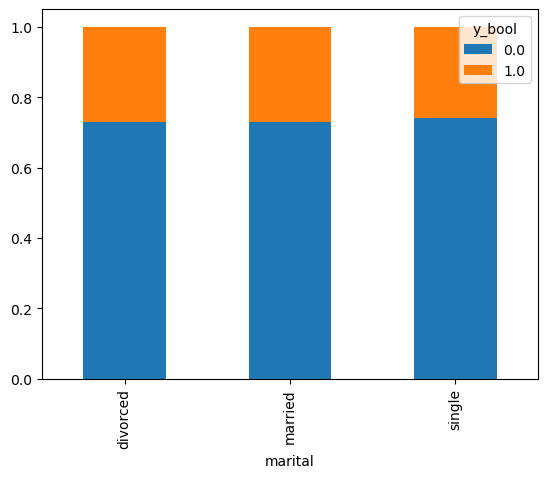

In [22]:
pd.crosstab(data['marital'],data['y_bool']).plot(kind = 'bar',stacked = True)
a.div(a.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)

array([<Axes: ylabel='failure'>, <Axes: ylabel='other'>,
       <Axes: ylabel='success'>, <Axes: ylabel='unknown'>], dtype=object)

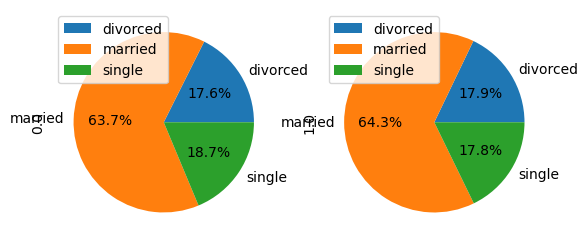

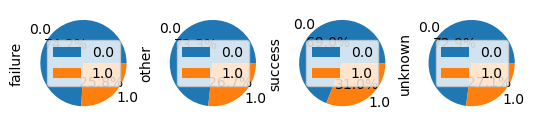

In [23]:
pd.crosstab(data['marital'],data['y_bool']).plot.pie(autopct = '%1.1f%%',subplots=True)
pd.crosstab(data['y_bool'],data['poutcome']).plot.pie(autopct = '%1.1f%%',subplots=True)

In [24]:
[print(i,data[i].nunique(),data[i].unique()) for i in cat_cols]


job 12 ['admin.' 'blue-collar' 'services' 'self-employed' 'technician'
 'management' 'unknown' 'unemployed' 'retired' 'housemaid' 'entrepreneur'
 'student']
marital 3 ['married' 'divorced' 'single']
education 4 ['tertiary' 'secondary' 'primary' 'unknown']
default 2 ['no' 'yes']
housing 2 ['no' 'yes']
loan 2 ['no' 'yes']
contact 3 ['cellular' 'unknown' 'telephone']
month 12 ['apr' 'may' 'feb' 'sep' 'jun' 'nov' 'jul' 'mar' 'oct' 'aug' 'jan' 'dec']
poutcome 4 ['unknown' 'success' 'failure' 'other']


[None, None, None, None, None, None, None, None, None]

In [97]:
# Pipelining


In [19]:
cat_preprocessing = Pipeline([
    ('ohe',OneHotEncoder(sparse = False,handle_unknown = 'ignore'))
])

In [20]:
num_preprocessing = Pipeline([
    ('ss',StandardScaler())
])

In [21]:
Final_preprocessing = ColumnTransformer(transformers=[
    ('category',cat_preprocessing,cat_cols),
    ('numerical',num_preprocessing,num_cols)
])

In [23]:
Package = Pipeline([
    ('preprocess',Final_preprocessing),
    ('model',KNeighborsClassifier(algorithm= 'auto',
 metric='minkowski',
 n_neighbors= 11))
])

In [24]:
x = train.drop(columns = 'y_bool')
y = train['y_bool']

In [25]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state = 50)

In [26]:
Package.fit(train_x,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [27]:
train_pred_y = Package.predict(train_x)
test_pred_y = Package.predict(test_x)

In [28]:
train_predproba_y = Package.predict_proba(train_x)
test_predproba_y = Package.predict_proba(test_x)

In [29]:
confusion_matrix(train_y,train_pred_y),confusion_matrix(test_y,test_pred_y)

(array([[11877,   359],
        [ 4096,   468]], dtype=int64),
 array([[2951,  162],
        [1018,   69]], dtype=int64))

In [30]:
print(classification_report(train_y,train_pred_y),classification_report(test_y,test_pred_y))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     12236
           1       0.57      0.10      0.17      4564

    accuracy                           0.73     16800
   macro avg       0.65      0.54      0.51     16800
weighted avg       0.70      0.73      0.66     16800
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      3113
           1       0.30      0.06      0.10      1087

    accuracy                           0.72      4200
   macro avg       0.52      0.51      0.47      4200
weighted avg       0.63      0.72      0.64      4200



In [31]:
print('Train accuracy score is {}, Test accuracy score is {}'.format(accuracy_score(train_y,train_pred_y),accuracy_score(test_y,test_pred_y)))

Train accuracy score is 0.7348214285714286, Test accuracy score is 0.719047619047619


In [32]:
print('Train Log Loss is {}, Test Log Loss is {}'.format(log_loss(train_y,train_pred_y),log_loss(test_y,test_pred_y)))

Train Log Loss is 9.558004514792675, Test Log Loss is 10.12655023789482


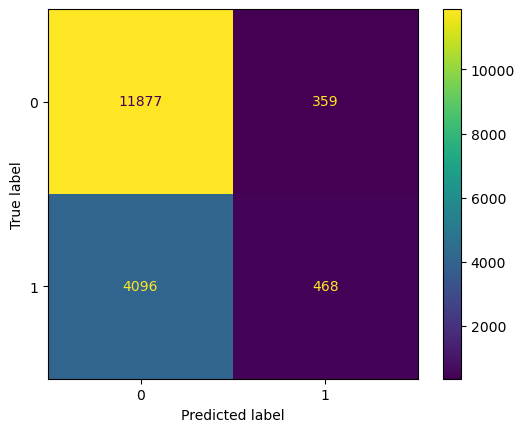

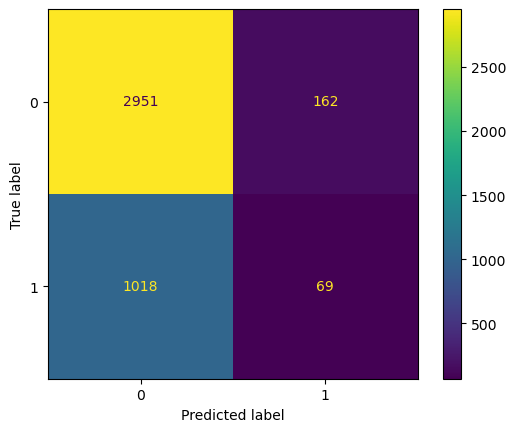

In [33]:
ConfusionMatrixDisplay.from_predictions(train_y,train_pred_y)
ConfusionMatrixDisplay.from_predictions(test_y,test_pred_y)

In [34]:
knn_param ={
    'model__n_neighbors' :[7,9,11],
    'model__algorithm' :['auto', 'ball_tree', 'kd_tree'],
    'model__metric' : ['minkowski','euclidean']
}

In [35]:
grid = GridSearchCV(estimator=Package,param_grid=knn_param,scoring='neg_log_loss',cv = 3)

In [36]:
grid.fit(train_x,train_y)

KeyboardInterrupt: 

In [44]:
grid.best_params_

{'model__algorithm': 'auto',
 'model__metric': 'minkowski',
 'model__n_neighbors': 11}

In [ ]:
grid.best_estimator_

In [46]:
grid.best_score_

-0.9161691336959326

In [60]:
grid_train_pred_proba_y = grid.best_estimator_.predict_proba(train_x)

In [64]:
pd.DataFrame(grid_train_pred_proba_y).head(5)

,0,1
0,0.818182,0.181818
1,0.909091,0.090909
2,0.818182,0.181818
3,0.545455,0.454545
4,0.909091,0.090909


In [65]:
pd.DataFrame(grid_train_pred_proba_y[:,1]).head(5)

,0
0,0.181818
1,0.090909
2,0.181818
3,0.454545
4,0.090909


In [79]:
# Test Data

In [101]:
Package.predict(test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
result = pd.DataFrame(Package.predict(test),columns = ['y_bool'])
result

,y_bool
0,0
1,0
2,0
3,0
4,0
...,...
8995,0
8996,0
8997,0
8998,0


In [107]:
result.to_csv('submission.csv',index = False)

In [37]:
joblib.dump(Package,'Package.pkl')

['Package.pkl']